In [335]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [336]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [337]:
X.shape, y.shape

((50000, 15), (50000,))

In [338]:
from sklearn.model_selection import train_test_split

In [339]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [340]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [341]:
from sklearn import linear_model

In [342]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

In [343]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.314605, T: 37500, Avg. loss: 0.455801
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.469578, T: 75000, Avg. loss: 0.394737
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580452, T: 112500, Avg. loss: 0.385561
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.660824, T: 150000, Avg. loss: 0.382161
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.717218, T: 187500, Avg. loss: 0.380474
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 15, Bias: -0.761816, T: 225000, Avg. loss: 0.379481
Total training time: 0.07 seconds.
Convergence after 6 epochs took 0.07 seconds


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

In [344]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.41177431,  0.18416782, -0.13895073,  0.33572511, -0.18423237,
          0.5494352 , -0.45213692, -0.08857465,  0.21536661,  0.17351757,
          0.18480827,  0.00443463, -0.07033001,  0.33683181,  0.02004129]]),
 (1, 15),
 array([-0.76181561]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [345]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)

In [346]:
import math

def sigmoid(m1 , m2 , bias):
    return 1/(1+math.exp(-(np.matmul(m1,m2)+bias)))
def loss_single(yi , pi):
    return yi*math.log(pi) + (1-yi)*math.log(1- pi)

In [347]:
loss = 0
for j in range(0,N):
        xi = X_train[j]
        yi = y_train[j]
        loss+=loss_single(yi , sigmoid(w.T , xi , b))
loss = -loss/N
epoch1 = []
loss_list = []
epoch2 = []
loss_list_test = []
print("epoch 0(initial) log loss for train" , loss)

loss = 0
for j in range(0,len(X_test)):
        xi = X_test[j]
        yi = y_test[j]
        loss+=loss_single(yi , sigmoid(w.T , xi , b))
loss = -loss/len(X_test)
print("epoch 0(initial) log loss for test" , loss)

for i in range(0,5):
    loss = 0
    for j in range(0,int(N)):
        xi = X_train[j]
        yi = y_train[j]
        w = (1 - (eta0*alpha)/N)*w + eta0*xi*(yi -sigmoid(w.T , xi , b))
        b = b + eta0*(yi - sigmoid(w.T , xi , b))
        
    for j in range(0,N):
        xi = X_train[j]
        yi = y_train[j]
        loss+=loss_single(yi , sigmoid(w.T , xi , b))
    loss = -loss/N
    epoch1.append(i+1)
    loss_list.append(loss)
    
    loss =0
    for j in range(0,len(X_test)):
        xi = X_test[j]
        yi = y_test[j]
        loss+=loss_single(yi , sigmoid(w.T , xi , b))
    loss = -loss/len(X_test)
    epoch2.append(i+1)
    loss_list_test.append(loss)

epoch 0(initial) log loss for train 0.6931471805594285
epoch 0(initial) log loss for test 0.6931471805600672


In [348]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[ 1.18097760e-02, -8.93579532e-04,  4.93110589e-03,
          1.08716050e-04,  5.42759504e-03, -3.85886766e-03,
          5.42721221e-03, -8.69546529e-03, -1.07486455e-02,
         -1.86851100e-02, -2.14161088e-03,  6.59440285e-03,
          4.24660210e-03,  2.84037282e-04,  1.26153626e-05]]),
 array([0.04404448]))

In [349]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9652000000000001
0.96272


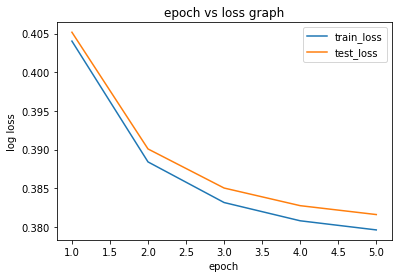

In [350]:
from matplotlib import pyplot as plt
plt.plot(epoch1 , loss_list, label = 'train_loss')
plt.plot(epoch2 ,loss_list_test , label = 'test_loss')
plt.title('epoch vs loss graph')
plt.xlabel('epoch')
plt.ylabel('log loss')
plt.legend()
plt.show()